In [1]:
from bitmex.bitmexREST import bitmexREST
from bitmex.bitmexAccountSettings import bitmexAccountSettings

In [2]:
acc = bitmexAccountSettings()
acc.from_config_file('../bitmex/BITMEX_connect.json')

In [3]:
rest = bitmexREST(apiKey=acc.apiKey, apiSecret=acc.apiSecret, isTestNet=acc.isTestNet)

In [5]:
result = rest.query_history_execution('XBTUSD', '2018-10-27 00:00:00', None)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(result)
df

,account,avgPx,clOrdID,commission,cumQty,execComm,execID,execType,lastPx,lastQty,leavesQty,ordStatus,ordType,orderID,orderQty,price,side,symbol,text,timestamp
0,101488,6408.50,,0.000750,3,35.0,642b15c9-67ee-d473-1ab6-62339a458974,Trade,6408.50,3.0,0,Filled,Limit,a5786111-73d8-fcd8-1237-29c9135d370c,3,6408.50,Buy,XBTUSD,Submission from testnet.bitmex.com,2018-10-27T03:45:53.204Z
1,101488,6408.50,,0.000750,10,117.0,9cb8f756-a17d-7d19-047b-54f5c1abd4ed,Trade,6408.50,10.0,0,Filled,Limit,da51cc3c-d665-e82b-5b6d-74a4682a58cc,10,6409.00,Buy,XBTUSD,Submission from testnet.bitmex.com,2018-10-27T03:46:28.259Z
2,101488,6417.13,,-0.000184,97,-278.0,0e16e649-d5e4-f822-9ec6-680139846227,Funding,6417.13,97.0,0,Filled,Limit,00000000-0000-0000-0000-000000000000,97,6417.13,,XBTUSD,Funding,2018-10-27T04:00:00.081Z
3,101488,6411.00,1540616102912695,0.000750,100,1169.0,b071b879-01e9-0ecd-8935-673fcf70eb64,Trade,6411.00,100.0,0,Filled,Market,17b26017-932d-5ff4-daa0-26b8a4ec6f71,100,6411.00,Sell,XBTUSD,[API][2018-10-27 12:55:02.912705],2018-10-27T04:55:02.568Z
4,101488,NaN,,NaN,0,NaN,7365d440-5e46-a5df-3dcd-3eaf63e4963e,New,NaN,NaN,99,New,Limit,7d4b9e26-40ca-7fbe-bbc8-dfa7fc13ecb5,99,6416.50,Sell,XBTUSD,Submission from testnet.bitmex.com,2018-10-27T05:23:55.296Z
5,101488,NaN,,NaN,0,NaN,ef8235e9-d861-b5c0-76c7-ca5dbfb38f84,Canceled,NaN,NaN,0,Canceled,Limit,7d4b9e26-40ca-7fbe-bbc8-dfa7fc13ecb5,99,6416.50,Sell,XBTUSD,Canceled: Cancel from testnet.bitmex.com\nSubm...,2018-10-27T05:24:13.795Z
6,101488,NaN,1540616104436209,NaN,0,NaN,0d62304e-be6f-157c-4efa-b8e010ab76f1,Canceled,NaN,NaN,0,Canceled,Limit,91ba2c5b-1f0d-e754-eec6-2df6fa415978,120,6365.00,Buy,XBTUSD,Canceled: Cancel from testnet.bitmex.com\n[API...,2018-10-27T05:46:49.534Z


In [10]:
df['DATETIME'] = pd.to_datetime(df.timestamp)

In [22]:
df_Exec_Trade = df.query('execType == "Trade"')
df_Exec_New = df.query('execType == "New"')
df_Exec_Canceled = df.query('execType == "Canceled"')

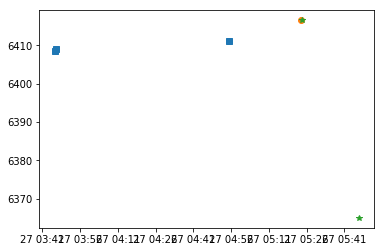

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_Exec_Trade.DATETIME, df_Exec_Trade.price, 's')
plt.plot(df_Exec_New.DATETIME, df_Exec_New.price, 'o')
plt.plot(df_Exec_Canceled.DATETIME, df_Exec_Canceled.price, '*')